In [ ]:
import io
from google.colab import files
import pandas as pd

uploaded = files.upload()
train = pd.read_csv(io.BytesIO(uploaded["train.csv"]))

Saving train.csv to train (2).csv


In [ ]:
import io
from google.colab import files
import pandas as pd

uploaded = files.upload()
test = pd.read_csv(io.BytesIO(uploaded["test.csv"]))

Saving test.csv to test.csv


In [ ]:
import io
from google.colab import files
import pandas as pd

uploaded = files.upload()
sample_submission = pd.read_csv(io.BytesIO(uploaded["sample_submission.csv"]))

Saving sample_submission.csv to sample_submission.csv


In [ ]:
train.shape

(3911, 8)

In [ ]:
test.shape

(3, 2)

In [ ]:
sample_submission.shape

(3, 7)

In [ ]:
train.isna().sum()

text_id        0
full_text      0
cohesion       0
syntax         0
vocabulary     0
phraseology    0
grammar        0
conventions    0
dtype: int64

In [ ]:
test.isna().sum()

text_id      0
full_text    0
dtype: int64

In [ ]:
sample_submission.isna().sum()

text_id        0
cohesion       0
syntax         0
vocabulary     0
phraseology    0
grammar        0
conventions    0
dtype: int64

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
cohesion,3911.0,3.127077,0.662542,1.0,2.5,3.0,3.5,5.0
syntax,3911.0,3.028254,0.644399,1.0,2.5,3.0,3.5,5.0
vocabulary,3911.0,3.235745,0.583148,1.0,3.0,3.0,3.5,5.0
phraseology,3911.0,3.116850,0.655997,1.0,2.5,3.0,3.5,5.0
grammar,3911.0,3.032856,0.699841,1.0,2.5,3.0,3.5,5.0
conventions,3911.0,3.081053,0.671450,1.0,2.5,3.0,3.5,5.0


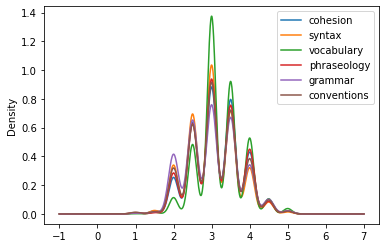

In [ ]:
train.plot.kde()

In [ ]:
train['ncaracteres'] = train['full_text'].str.len()
promedio_caract = round(train['ncaracteres'].mean())
max_caract = round(train['ncaracteres'].max())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


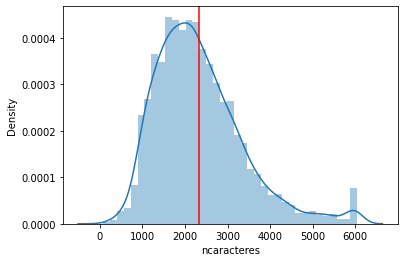

In [ ]:
sns.distplot(train['ncaracteres'])
plt.axvline(x = promedio_caract, color = 'red')

In [ ]:
train['npalabra'] = train['full_text'].apply(lambda x: len(x.split()))
promedio_pala = round(train['npalabra'].mean())
max_pala = round(train['npalabra'].max())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


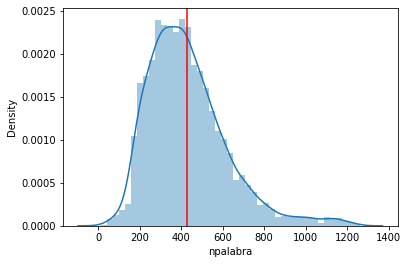

In [ ]:
sns.distplot(train['npalabra'])
plt.axvline(x = promedio_pala, color = 'red')

In [ ]:
import plotly.figure_factory as ff
plot_distribution_per_score('npalabra')

NameError: ignored

In [ ]:
from collections import Counter
from sklearn.datasets import fetch_20newsgroups
import re


corpus = []
for line in fetch_20newsgroups().data:
    line = line.replace('\n', ' ').replace('\t', ' ').lower()
    line = re.sub('[^a-z ]', ' ', line)
    tokens = line.split(' ')
    tokens = [token for token in tokens if len(token) > 0]
    corpus.extend(tokens)

corpus = Counter(corpus)

In [ ]:
#%reload_ext  autoreload
#%autoreload 2

import sys, os
def add_aion(curr_path=None):
    if curr_path is None:
        dir_path = os.getcwd()
        target_path = os.path.dirname(os.path.dirname(dir_path))
        if target_path not in sys.path:
#             print('Added %s into sys.path.' % (target_path))
            sys.path.insert(0, target_path)
            
add_aion()

In [ ]:
from aion.util.spell_corrector import SpellCorrector

spell_corrector = SpellCorrector(dictionary=corpus, verbose=1)
spell_corrector.correction('edwardd')

ModuleNotFoundError: ignored

In [ ]:
sample_submission

,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,3.0,3.0,3.0,3.0,3.0,3.0
1,000BAD50D026,3.0,3.0,3.0,3.0,3.0,3.0
2,00367BB2546B,3.0,3.0,3.0,3.0,3.0,3.0


In [ ]:
train

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,ncaracteres,npalabra
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,1387,261
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,2635,533
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,1663,320
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,3973,728
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,1326,234
...,...,...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5,977,179
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0,2603,465
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0,1298,257
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5,2833,510


In [ ]:
test

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."
